<h2> Exercise 2 - Convergence of the Empirical Distribution </h2>

We will now verify visually that histograms of the empirical distribution for an IID sample of increasing size converge to the population distribution.  We'll do this for a discrete Binomial random variable as well as a LogNormal random variable.  Specifically, a Binomial($n$,$p$) variable gives the number of successes in $n$ Bernoulli trials, while a LogNormal distribution is the distribution of a variable $X$ for which $\log(X)$ is normally distributed.

In [56]:
using Distributions
using PyPlot
Trials = 10;
succProb = 0.5;
dDisc = Binomial(Trials,succProb);
dCont = LogNormal();

I'll calculate the histograms for a two different sample sizes, $N_{\text{small}}$ and $N_{\text{large}}$.  First, examine the discrete variable.  

In [57]:
Nsmall = 100;
Nlarge = 1000;

sampDiscSmall = rand(dDisc,Nsmall);
sampDiscLarge = rand(dDisc,Nlarge);

The empirical distribution just places probability $1/N$ on each of the sample outcomes.  In the case of a discrete distribution, we can have repetition of outcomes, so we need to sum over the number of occurences of each.  The resulting ratios already provide us with a histogram, so there is no need to further bin the data.

In [58]:
EmpDistProbsSmall = (1.0/Nsmall)*[sum(sampDiscSmall.==nSucc) for nSucc=1:Trials];
EmpDistProbsLarge = (1.0/Nlarge)*[sum(sampDiscLarge.==nSucc) for nSucc=1:Trials];

We can now plot the two empirical distributions against the theoretical distribution.

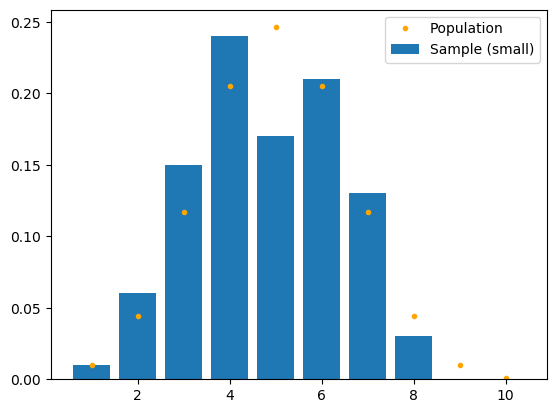

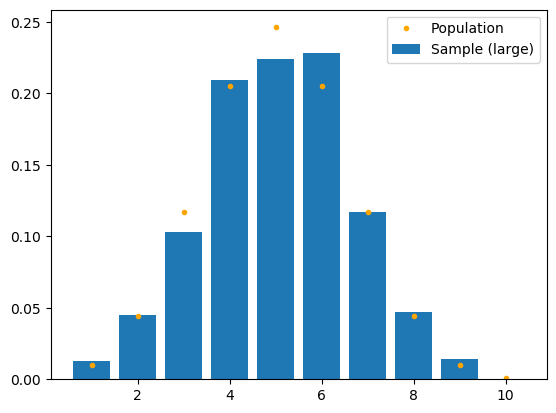

In [59]:
PopDist = pdf.(dDisc,1:1:Trials)
PyPlot.plt.bar(1:1:Trials,EmpDistProbsSmall,label="Sample (small)");
plot(1:1:Trials,PopDist,color="orange",".",label="Population");
legend();
figure();
PyPlot.plt.bar(1:1:Trials,EmpDistProbsLarge,label="Sample (large)");
plot(1:1:Trials,PopDist,color="orange",".",label="Population");
legend();

Next, examine the continuous distribution. Since a continuous variable can take on uncountably many values, the sample should essentially never contain the same value twice.  Consequently, the empirical distribution will be flat at $1/N$, but will exhibit clustering in high-probability regions.

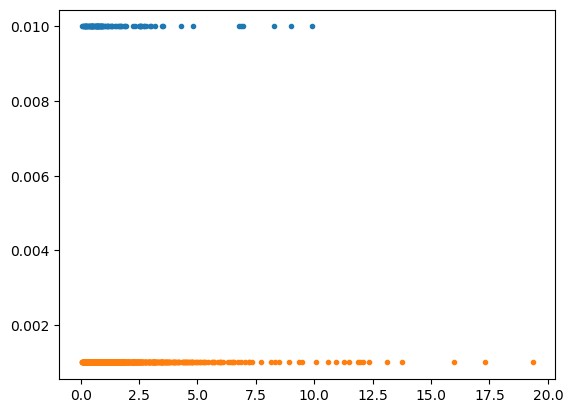

In [60]:
sampContSmall = rand(dCont,Nsmall);
sampContLarge = rand(dCont,Nlarge);

plot(sampContSmall,(1.0/Nsmall)*ones(length(sampContSmall)),".",label="Small Sample");
plot(sampContLarge,(1.0/Nlarge)*ones(length(sampContLarge)),".",label="Large Sample");

To get a picture which looks closer to the PDF, we need to group nearby samples into a relatively small number of bins $M$.

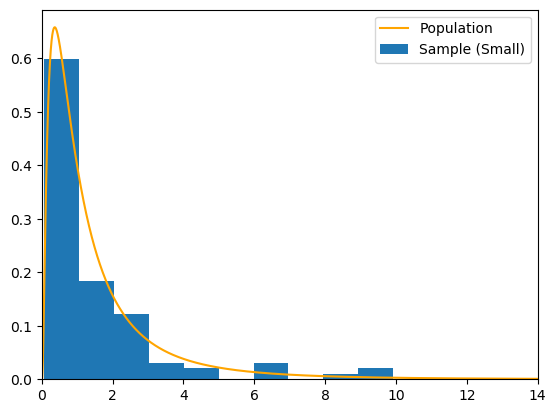

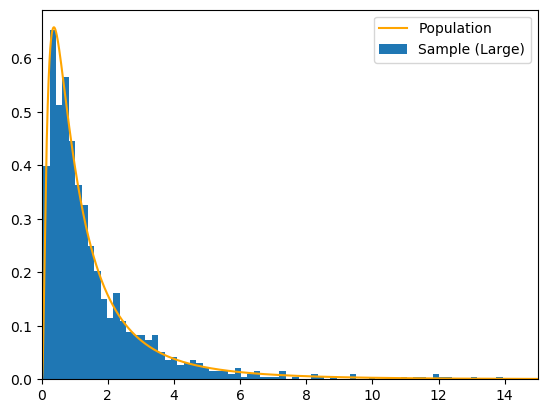

In [61]:
Msmall = 10;
Mlarge = 100;

gx = 0.001:0.001:15;
gpdf = pdf.(dCont,gx);

plt.hist(sampContSmall,Msmall,normed=true,label="Sample (Small)");
plot(gx,gpdf,color="orange",label = "Population")
xlim([0;14]);
legend()
figure()
plt.hist(sampContLarge,Mlarge,normed=true,label="Sample (Large)");
plot(gx,gpdf,color="orange",label = "Population")
xlim([0;15]);
legend();